# **Credit card fraud detection**
## Team members: Tim Harris & Trinh Tran
## Professor: Diala Ezzeddine

# Problem framing
Financial institutions need to reliably identify fraudulent credit card transactions to prevent
monetary loss and protect customers. The Credit Card Fraud Detection dataset from Kaggle
contains 284,807 real credit card transactions collected over two days, of which only 492
are labeled as fraudulent, making the dataset highly imbalanced. The dataset includes
anonymized numerical features obtained via Principal Component Analysis (PCA), along
with the original Time and Amount features, and a binary target label indicating whether a
transaction is fraudulent (Class = 1) or not (Class = 0).


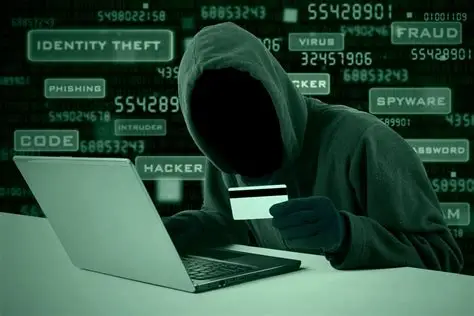

The goal is to design a system that accurately categorizes transactions to protect the bank's
assets while ensuring that 99.9% of honest customers never even notice the system is
running. We are looking for the case where we catch the most thieves while bothering the
fewest customers.

To solve this, we must:
- Detect and classify transactions as either fraudulent or legitimate despite the
extreme class imbalance.
- Mitigate the impact of skewed class distribution by applying techniques like
resampling, class weighting, or algorithmic modifications.
- Evaluate model performance using metrics appropriate for imbalanced
classification.

This problem is formulated as a binary classification task where the model should learn patterns that distinguish genuine transactions from fraudulent ones based on the provided features. This is important because fraudulent transactions are rare but costly, class imbalance makes detection challenging, and accurate models are essential to minimize financial loss while avoiding unnecessary disruption to legitimate customers.

# Data loading and exploration

## Get the data

In [1]:
import pandas as pd

In [2]:
url = "https://huggingface.co/datasets/tnltrinh/credit_card_fraud/resolve/main/dataset/creditcard.csv"
df = pd.read_csv(url)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

All columns are numeric. The possible features may be columns from V1 to V28, Time, Amount and what we try to predict is Class.

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The time of transactions are vary from 0 to 172792 means the transactions can last up to 172792 seconds

In [5]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


There is no missing values, so we don't need to handle the missing values.

## Exploring the fraud data

Preview some data when there was a fraud:

In [6]:
df_fraud = df[df['Class'] == 1]
df_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [7]:
df_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


## Exploring the legit data

In [8]:
df_legit = df[df['Class'] == 0]
df_legit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df_legit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


## Correlation overview

In [10]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


The Class columns has weak correlations with all the possible feature columns. We may need to handle some class imbalance and standardize the data.

## Adding features

In [11]:
df_legit_hours = df_legit['Time'] / 3600
df_fraud_hours = df_fraud['Time'] / 3600

## EDA
### Class imbalance problem

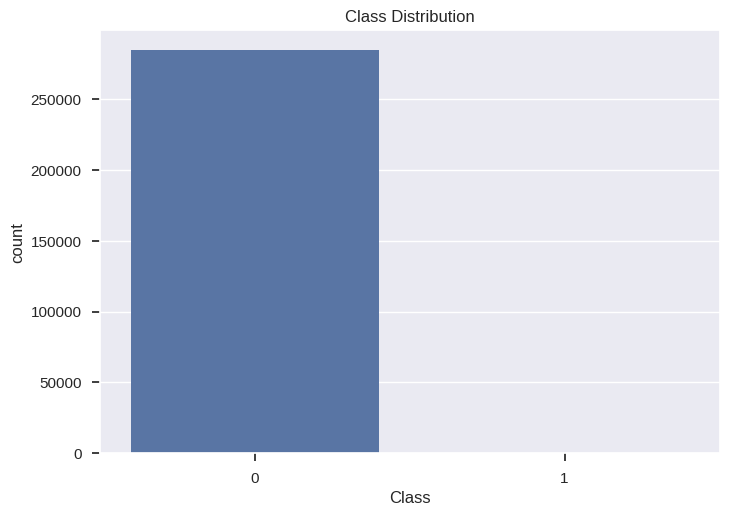

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("seaborn-v0_8")
sns.set_context("notebook")

class_counts = df['Class'].value_counts()
class_ratios = df['Class'].value_counts(normalize=True)
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()

In [13]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


As we can see from the chart and the result of the command, there's a significant imbalance: a vast majority of transactions are legitimate (Class 0), while fraudulent transactions (Class 1) are extremely rare. This severe class imbalance is a critical challenge in fraud detection, as machine learning models can struggle to learn patterns from the minority class without specific handling techniques.

### Transaction Time Distribution Overview


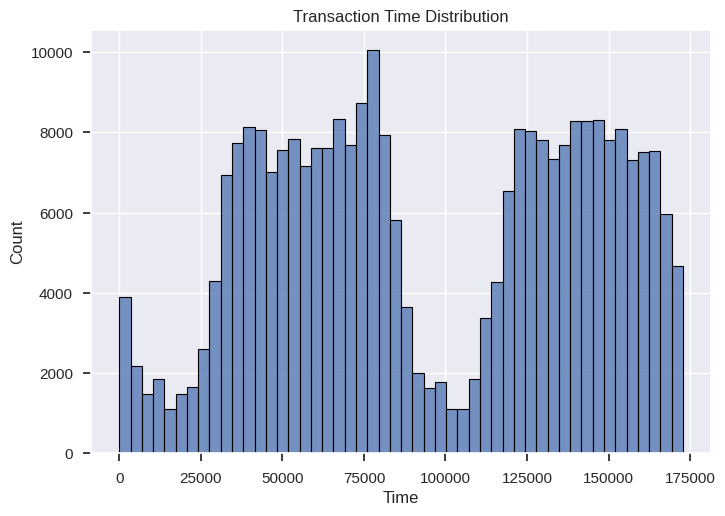

In [14]:
sns.histplot(df['Time'], bins=50)
plt.title("Transaction Time Distribution")
plt.show()

This histogram shows the distribution of transaction times. The x-axis represents 'Time' (in seconds since the first transaction in the dataset), and the y-axis represents the count of transactions. We can observe distinct peaks and valleys in the transaction volume over time, possibly indicating daily cycles or periods of higher activity.

### Transaction Time (in Hour) Distribution by Class

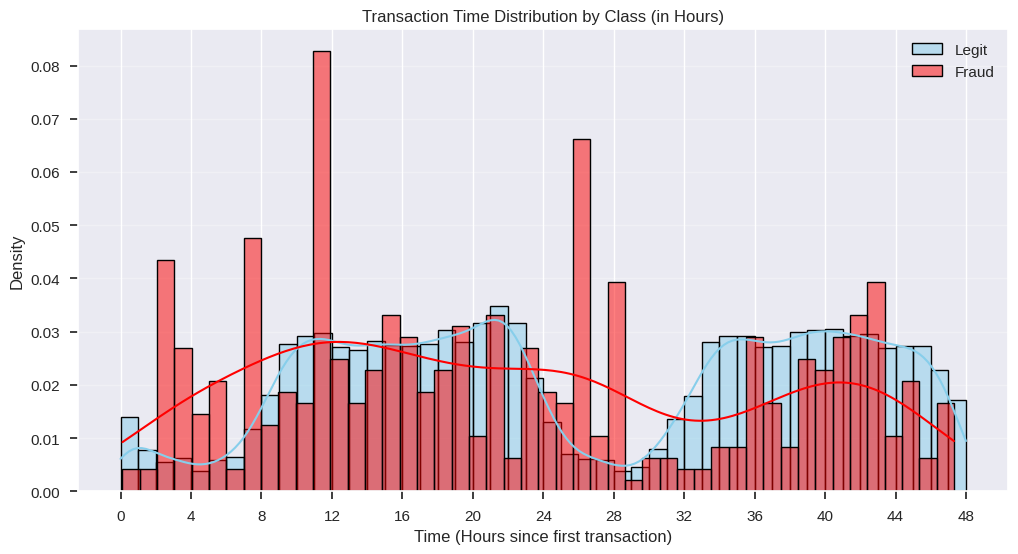

In [15]:
plt.figure(figsize=(12, 6))

sns.histplot(df_legit_hours, color='skyblue', label='Legit', kde=True, stat='density', alpha=0.5, bins=48)
sns.histplot(df_fraud_hours, color='red', label='Fraud', kde=True, stat='density', alpha=0.5, bins=48)
plt.title('Transaction Time Distribution by Class (in Hours)')
plt.xlabel('Time (Hours since first transaction)')
plt.ylabel('Density')

plt.xticks(range(0, 52, 4))

plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

We use this chart to scale the transaction time distribution by class of both Legit and Fraud. This chart shows:
- Legit transactions density follows a natural human rhythm. Significant "valleys" (low activity) occur roughly every 24 hours, representing a sleep period.
- Fraud transactions density shows no strong cyclical pattern. Fraudsters operate around the clock, including during "dead hours" when legitimate density is near zero.
- The tall red bars indicate concentrated bursts of fraud, likely automated attacks or batch processing, rather than individual human behavior.

### Fraud Occurrence Over Time Overview


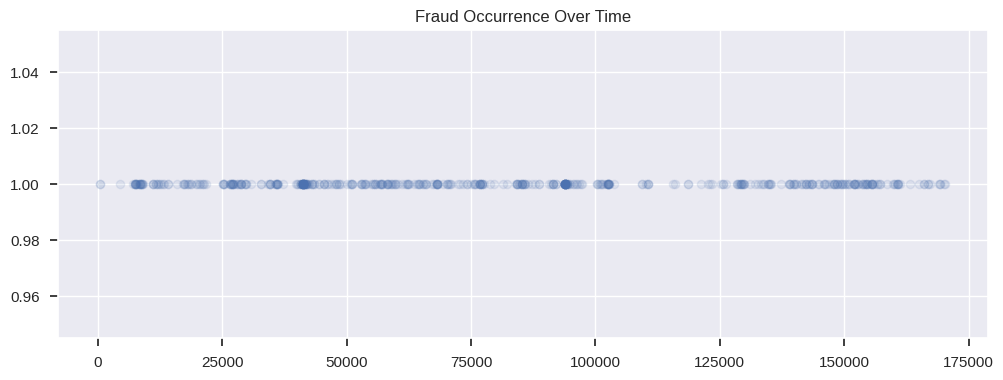

In [16]:
plt.figure(figsize=(12,4))
plt.scatter(df_fraud['Time'], df_fraud['Class'], alpha=0.1)
plt.title("Fraud Occurrence Over Time")
plt.show()

This scatter plot visualizes the occurrence of fraudulent transactions against the transaction 'Time'. This plot helps to identify if fraudulent activities are concentrated during specific periods or if they are more spread out. No obvious large-scale temporal clusters of fraud are immediately apparent, but smaller patterns might exist.

### Transaction Amount Distribution & Log-Scaled Amount Distribution Overview


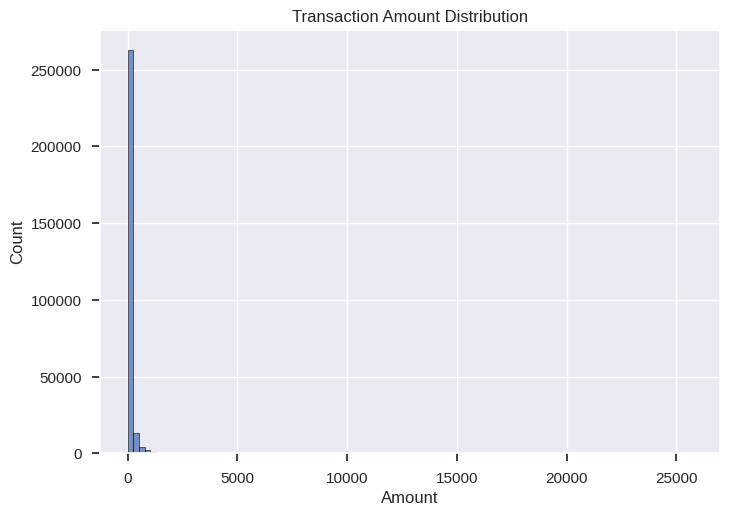

In [17]:
sns.histplot(df['Amount'], bins=100)
plt.title("Transaction Amount Distribution")
plt.show()

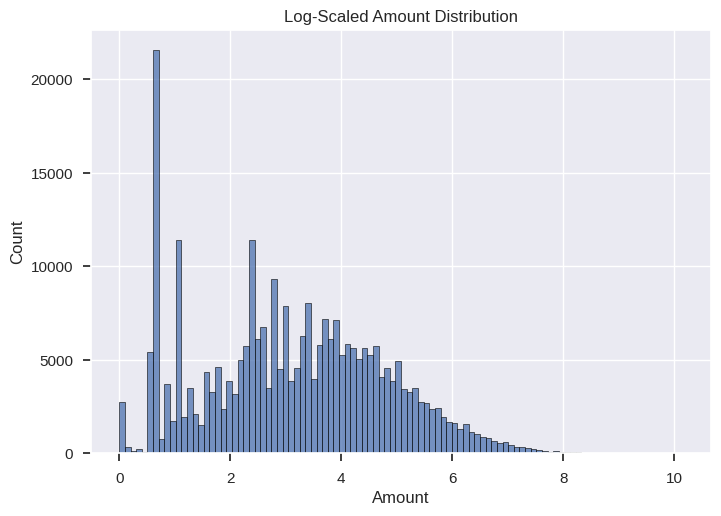

In [18]:
sns.histplot(np.log1p(df['Amount']), bins=100)
plt.title("Log-Scaled Amount Distribution")
plt.show()

These two histograms display the distribution of transaction 'Amount'.

*   Transaction Amount Distribution: This first plot shows that most transactions involve small amounts, with a long tail extending to very large amounts. This indicates a highly skewed distribution.
*   Log-Scaled Amount Distribution: By applying a log transformation np.log1p to the 'Amount' feature, the second histogram reveals a more symmetrical, bell-shaped distribution. This transformation is often useful for features with highly skewed distributions, as it can help models learn more effectively from the data and reduce the impact of extreme outliers.

### Transaction Amount by Class Overview

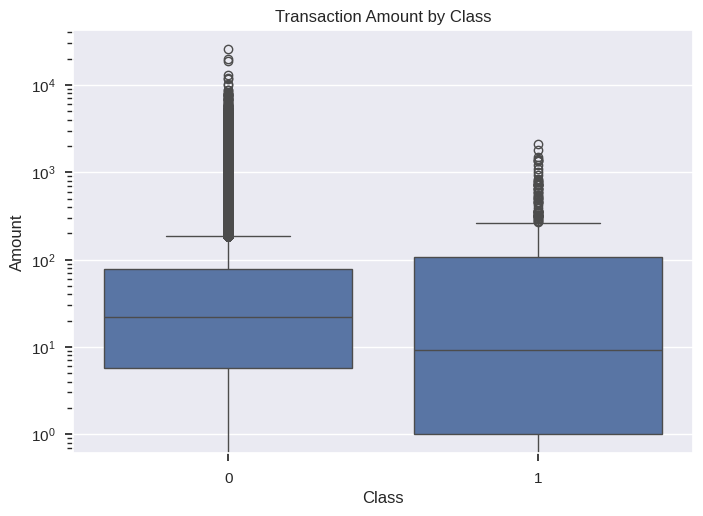

In [19]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.yscale('log')
plt.title("Transaction Amount by Class")
plt.show()

This box plot (with a logarithmic y-axis) compares the distribution of transaction 'Amount' for legitimate (Class 0) and fraudulent (Class 1) transactions. From the box plot, we can see that the mean of fraud transactions is less than the mean of legit transactions. However, the upper quantile and lower quantiles of fraud transactions seem to be in a larger range compared to legit transactions upper and lower quantiles which can help us assume that a fraud transaction does not always have a large amount, it can start from a small amount.

### Feature Correlation with Class Overview

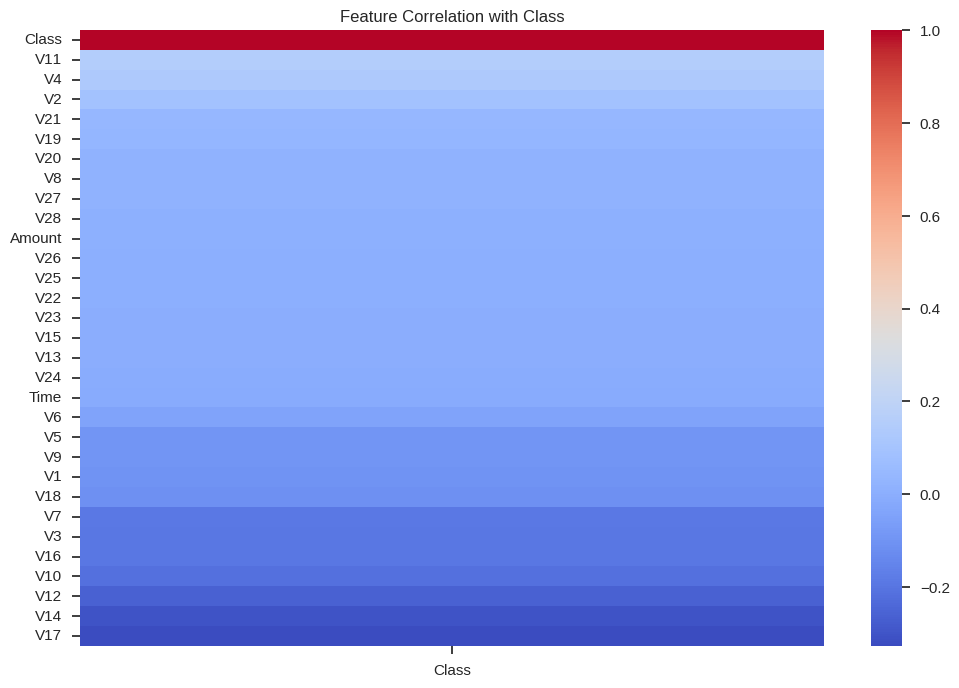

In [20]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr[['Class']].sort_values(by='Class', ascending=False),
            annot=False, cmap='coolwarm')
plt.title("Feature Correlation with Class")
plt.show()

This heatmap shows that there are not many correlation between the Class and other columns. From the heatmap, we can see that V17 is the most less correlated to Class, and V11 is the most correlated to Class.

In [21]:
full_corr = df.corr()

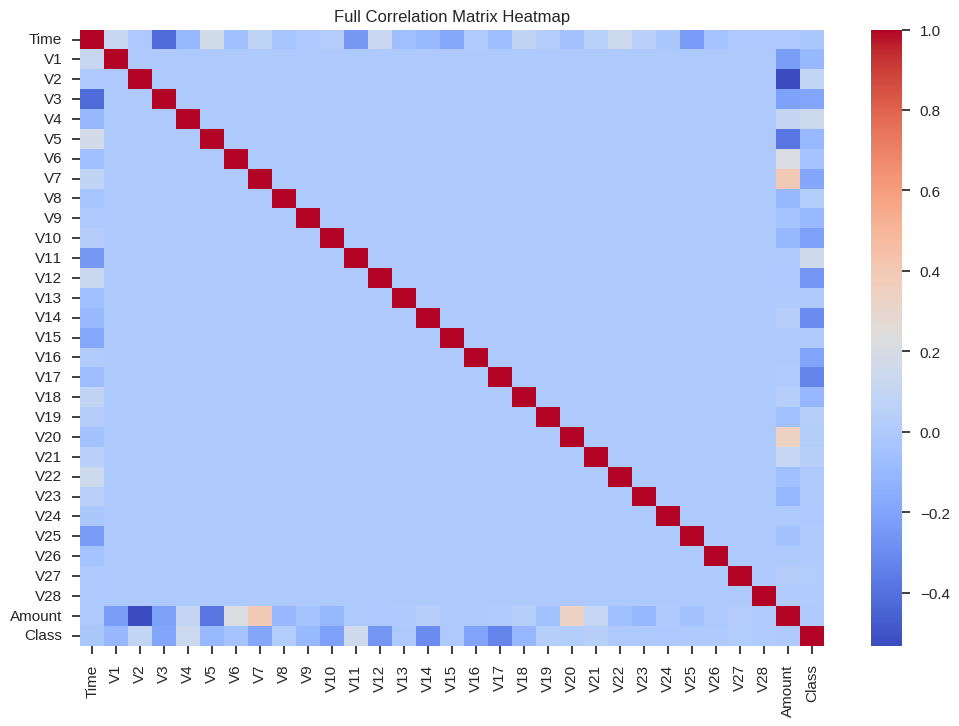

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(full_corr, annot=False, cmap='coolwarm')
plt.title("Full Correlation Matrix Heatmap")
plt.show()

Time and Amount exhibit some noticeble correlations with the V features

### Corr on fraud data
This is a fraud data so we won't consider about the correlation between Class and other V columns as the Class for this data is equal to 1. In this chart, we focus about the correlations between different V columns



In [23]:
fraud_cor = df_fraud.corr()

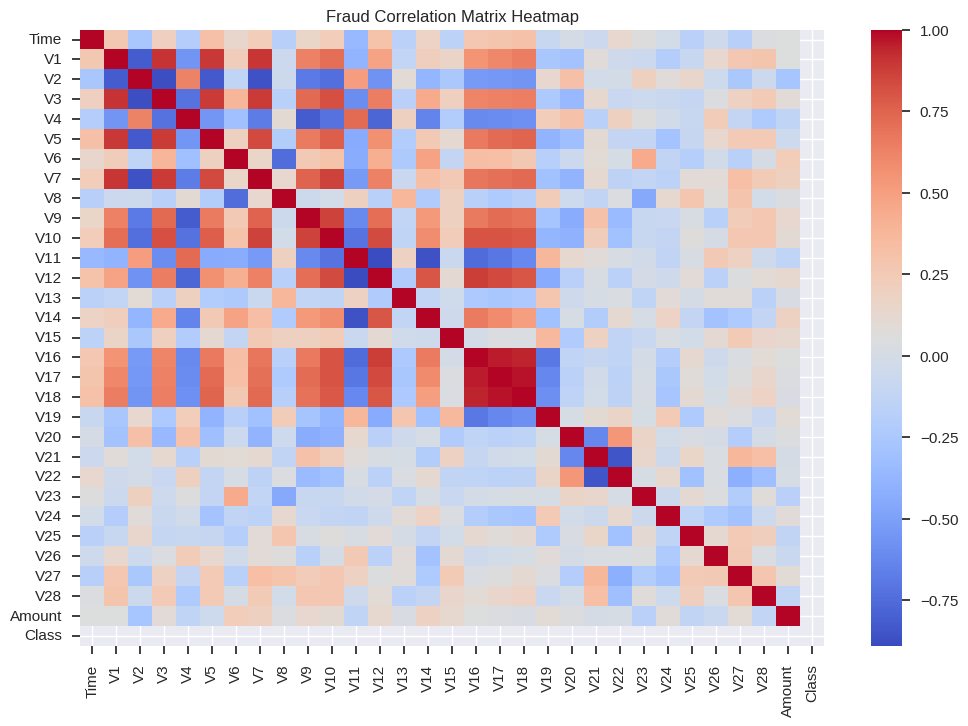

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(fraud_cor, annot=False, cmap='coolwarm')
plt.title("Fraud Correlation Matrix Heatmap")
plt.show()

On the fraud data, the correlations are clearer and significant:
- Features like V16, V17, and V18 show strong positive correlations with each other (the red square). We can consider to eliminate one or two of these features
- Feature V9 and V10 also show a strong posive correlation with each other
- (V9, V10) and (V16, 17, 18) show a strong positive correlation
- These features (at the edges) show very light colors compared to the V-features. This suggests that Amount and Time don't have a strong linear relationship with many of the anonymized V-features.

In general, features from V1 to V18 show a strong correlation between them. Features from V19 to V28 have slight correlations to all of the features.


### Corr on legit data

In [25]:
legit_cor = df_legit.corr()

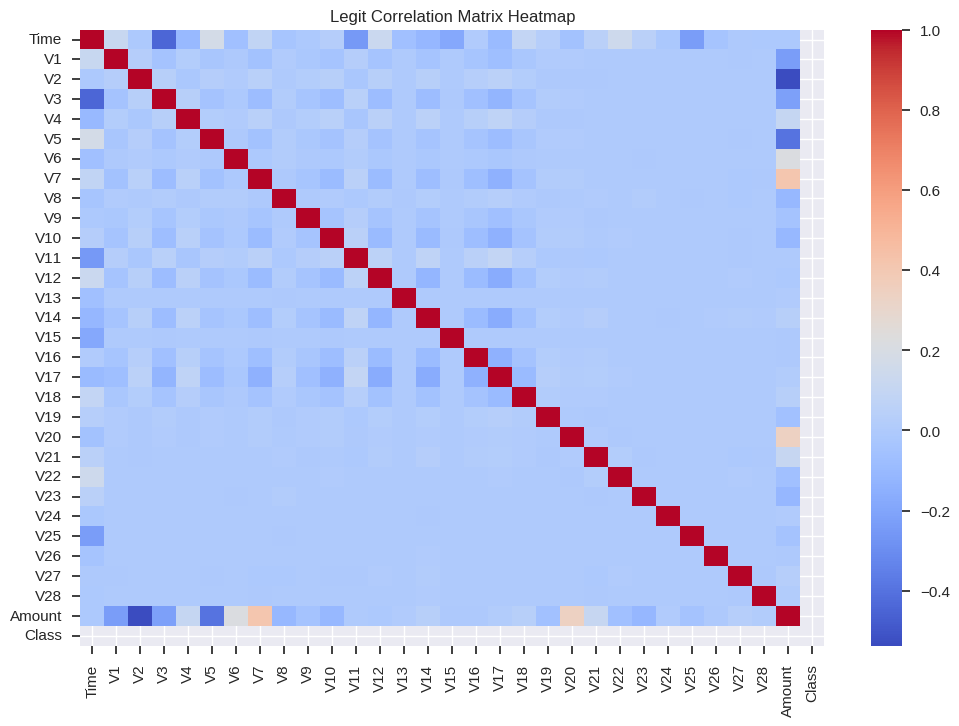

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(legit_cor, annot=False, cmap='coolwarm')
plt.title("Legit Correlation Matrix Heatmap")
plt.show()

In contrast, the correlation heat map for legit data has very few noticeable correlations.  

### Amount Outliers Overview


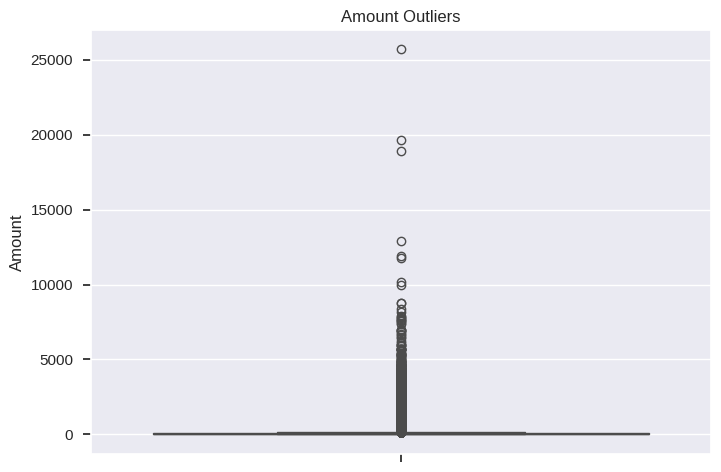

In [27]:
sns.boxplot(y=df['Amount'])
plt.title("Amount Outliers")
plt.show()

This plot confirms the presence of many outliers in the 'Amount' feature, which is consistent with the skewed distribution observed in the histograms. Handling these outliers may be necessary for robust model performance.

# Create Random Forest Pipeline


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target
X = df.drop("Class", axis=1)
y = df["Class"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Scale "Amount" column
preprocessor = ColumnTransformer(
    transformers=[
        ("amount_scaler", StandardScaler(), ["Amount"])
    ],
    remainder="passthrough"
)

pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=100,
        class_weight="balanced",
        n_jobs=-1,
        random_state=42
    ))
])

pipeline.fit(X_train, y_train)

# Make predictions and Evaluate Pipeline

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Predictions
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

# ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)


[[56861     3]
 [   25    73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9529168413285405


# Plot ROC curve for Random Forest

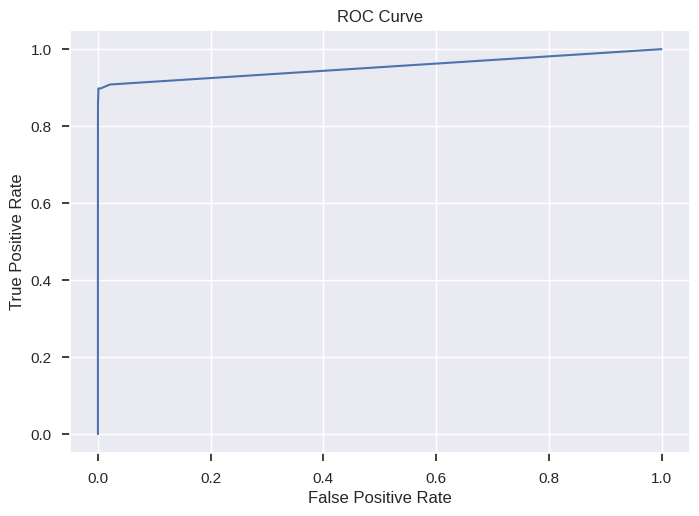

In [31]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
